<a href="https://colab.research.google.com/github/Arko04/Colab/blob/main/AI_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="display:block;width:100%;margin:auto;" direction=rtl align=center><br><br>
    <div  style="width:100%;margin:100;display:block;background-color:#fff0;"  display=block align=center>
        <table style="border-style:hidden;border-collapse:collapse;">
            <tr>
                <td  style="border: none!important;">
        <img width=230 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
                </td>
                <td style="text-align:center;border: none!important;">
                <h1 align=center><font size=5 color="#045F5F"> <b>Assignment 1</b><br><br>Alireza Karimi</i></font></h1>
                </td>
                <td style="border: none!important;">
        <img width=300 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
                </td>
            </tr>
        </table>



My name is Alireza Karimi

My student number is 810101492

#**Introduction:**

Today, we will discuss different optimizers and also SMOTE, a method of oversampling.

In [ ]:
from google.colab import drive
drive.mount('/content/grive')

Mounted at /content/grive


In [ ]:
from IPython.display import Image

# <b><font color='green'>Part1:</font></b> Mathematical intuition behind optimizers

## **1_1: Stochastic Gradient Descent (SGD):**

***1_1_1: Mathematical Background:***

****1_1_1_1: Standard Gradient Descent (GD):****

$$\nabla_{\theta} J(\theta) = \frac{1}{N} \sum_{i=1}^{N} \nabla_{\theta} J_i(\theta)$$


*   $J$ is our loss function, for example:

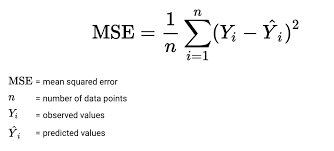

In [ ]:
Image(filename='/content/grive/MyDrive/Slides/Assignment1_AI/MSE.png', width=400,height=200)

source: https://emilia-orellana44.medium.com/

* $\theta$ represents the parameters of the function. It is a vector (matrix) because it represents all the parameters of the model. They can be weights or biases.


* $\nabla J$ is the gradient vector representing the partial derivatives of the loss function with respect to paramters


For example, if we have parameters $w_1$, $w_2$,..., $w_n$, then the gradient vector would be:

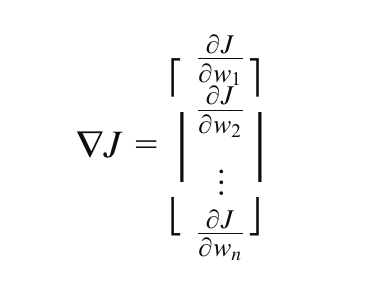

In [ ]:
Image(filename='/content/grive/MyDrive/Slides/Assignment1_AI/weights.png', width=400,height=250)

source: https://chat.openai.com/

Similarly, if we have parameters
$b_1$, $b_2$,..., $b_n$, then the gradient vector would be:

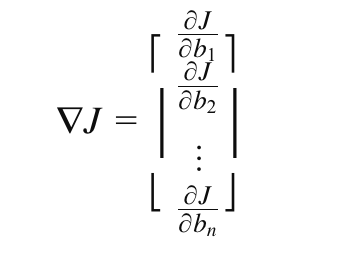

In [ ]:
Image(filename='/content/grive/MyDrive/Slides/Assignment1_AI/biases.png', width=400,height=250)

source: https://chat.openai.com/

*  $i$ is our sample.



*  $N$ is the number of samples or observations.


*  $\frac{1}{N}$ is used for dividing the sum of squared errors by the number of samples or observations to get the mean of the loss function.

****1_1_1_2: Parameter Update:****

$$\theta = \theta - \eta \nabla_{\theta} J(\theta) $$

* $\theta$ is a vector representing the parameters of the model.
* $\eta$ is a scalar representing the learning rate. common values of $\eta$ are between 0.01 and 0.0001
* $\nabla_{\theta} J(\theta)$ is the gradient vector representing the partial derivatives of the loss function
$J$ with respect to the parameters $\theta$.

**What if we have a large training data?**

***1_1_2: Mathematical Formula:***

$$\nabla_{\theta} J(\theta) = \frac{1}{K} \sum_{i=1}^{K} \nabla_{\theta} J_i(\theta)$$

Stochastic basicly means random.

Where each time (and for each epoch(=iteration)), we use $K$ **random** samples of our $N$ samples to calculate the loss function.

We use small **batches** of data for each iteration.

We update the parameters like before:

$$\theta = \theta - \eta \nabla_{\theta} J(\theta) $$

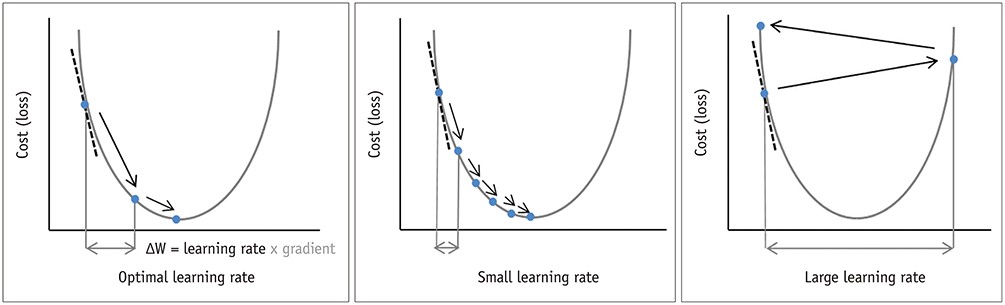

In [ ]:
Image(filename='/content/grive/MyDrive/Slides/Assignment1_AI/learning_rate.jpeg', width=1000,height=300)

## **1_2: SGD + Momentum:**

***1_2_1: Mathematical Background:***

**Saddle points** are critical points where the gradient of the loss function is zero but the point is neither a maximum nor a minimum.

**local minima** are points where the loss function is lower than in the surrounding area but not necessarily the global minimum.

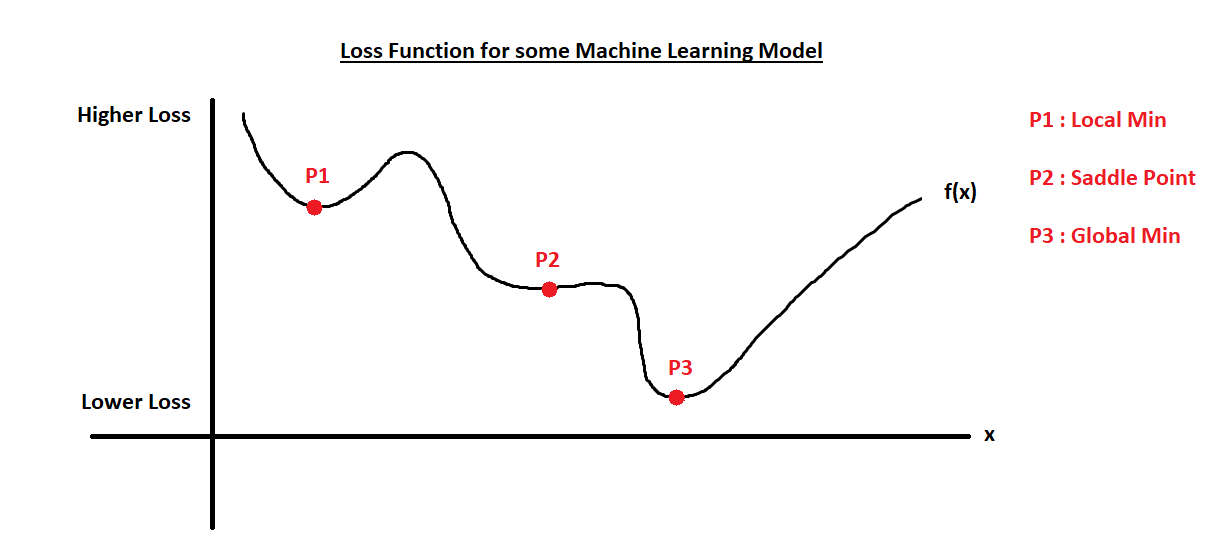

In [ ]:
Image(filename='/content/grive/MyDrive/Slides/Assignment1_AI/minima.png', width=800,height=600)

**What about Saddle points and local minima?**

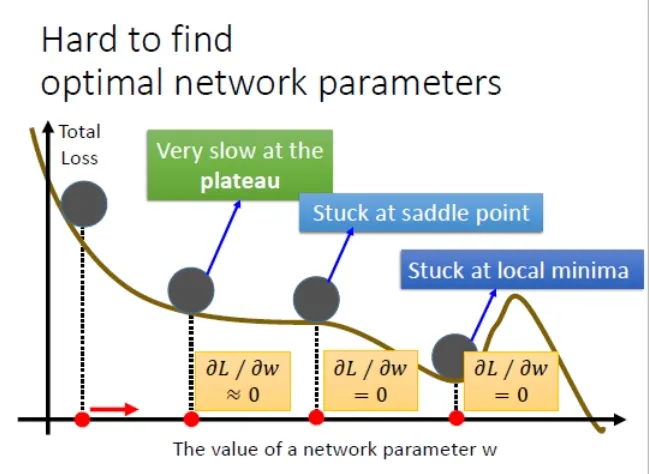

In [ ]:
Image(filename='/content/grive/MyDrive/Slides/Assignment1_AI/sgd_rolling_ball.png', width=500,height=400)

source: https://medium.com/ai%C2%B3-theory-practice-business/hyper-parameter-momentum-dc7a7336166e

***1_2_2: Analogy:***

Imagine a ball rolling down a track that represents the loss function.

**Passing flat minima and saddle points:**

*   When the ball reaches a flat minimum or a saddle point on the track, it has built up enough velocity from the previous steps.
*   This momentum allows the ball to "pass through" these flat or saddle regions, instead of getting stuck in them.

**Escaping small local minima:**


*   As the ball rolls down the track, it may encounter small local minima (shallow dips in the track).
*   The momentum of the ball helps it "escape" these small local minima, allowing it to continue moving towards the global minimum.

That is exactly what momentum can do to our model.

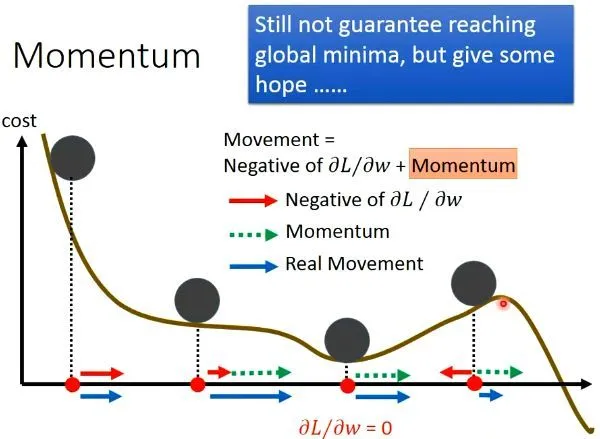

In [ ]:
Image(filename='/content/grive/MyDrive/Slides/Assignment1_AI/rolling_ball.png', width=500,height=400)

source: https://medium.com/ai%C2%B3-theory-practice-business/hyper-parameter-momentum-dc7a7336166e

**meaning of momentum in mechanics:**

It refers to the property of an object in motion to continue moving in the same direction unless acted upon by an external force.

***1_2_3: Mathematical Formula:***

Here is our step size for each epoch:


$$v_t = \rho v_{t-1} + \eta \nabla_{\theta} J(\theta) $$

*   $v_t$ is the momentum term at time step $t$.
*   $\rho$ is the momentum parameter, typically set between 0 and 1 (usually between 0.9 and 0.999)




Here is our update:

$$\theta = \theta - v_t$$

When the gradients consistently point in the same direction over time, the momentum term amplifies this direction, leading to accelerated updates in the direction of steeper gradients.

***1_2_4: The Effect Of $\rho$:***

For SGD, we have something like this:

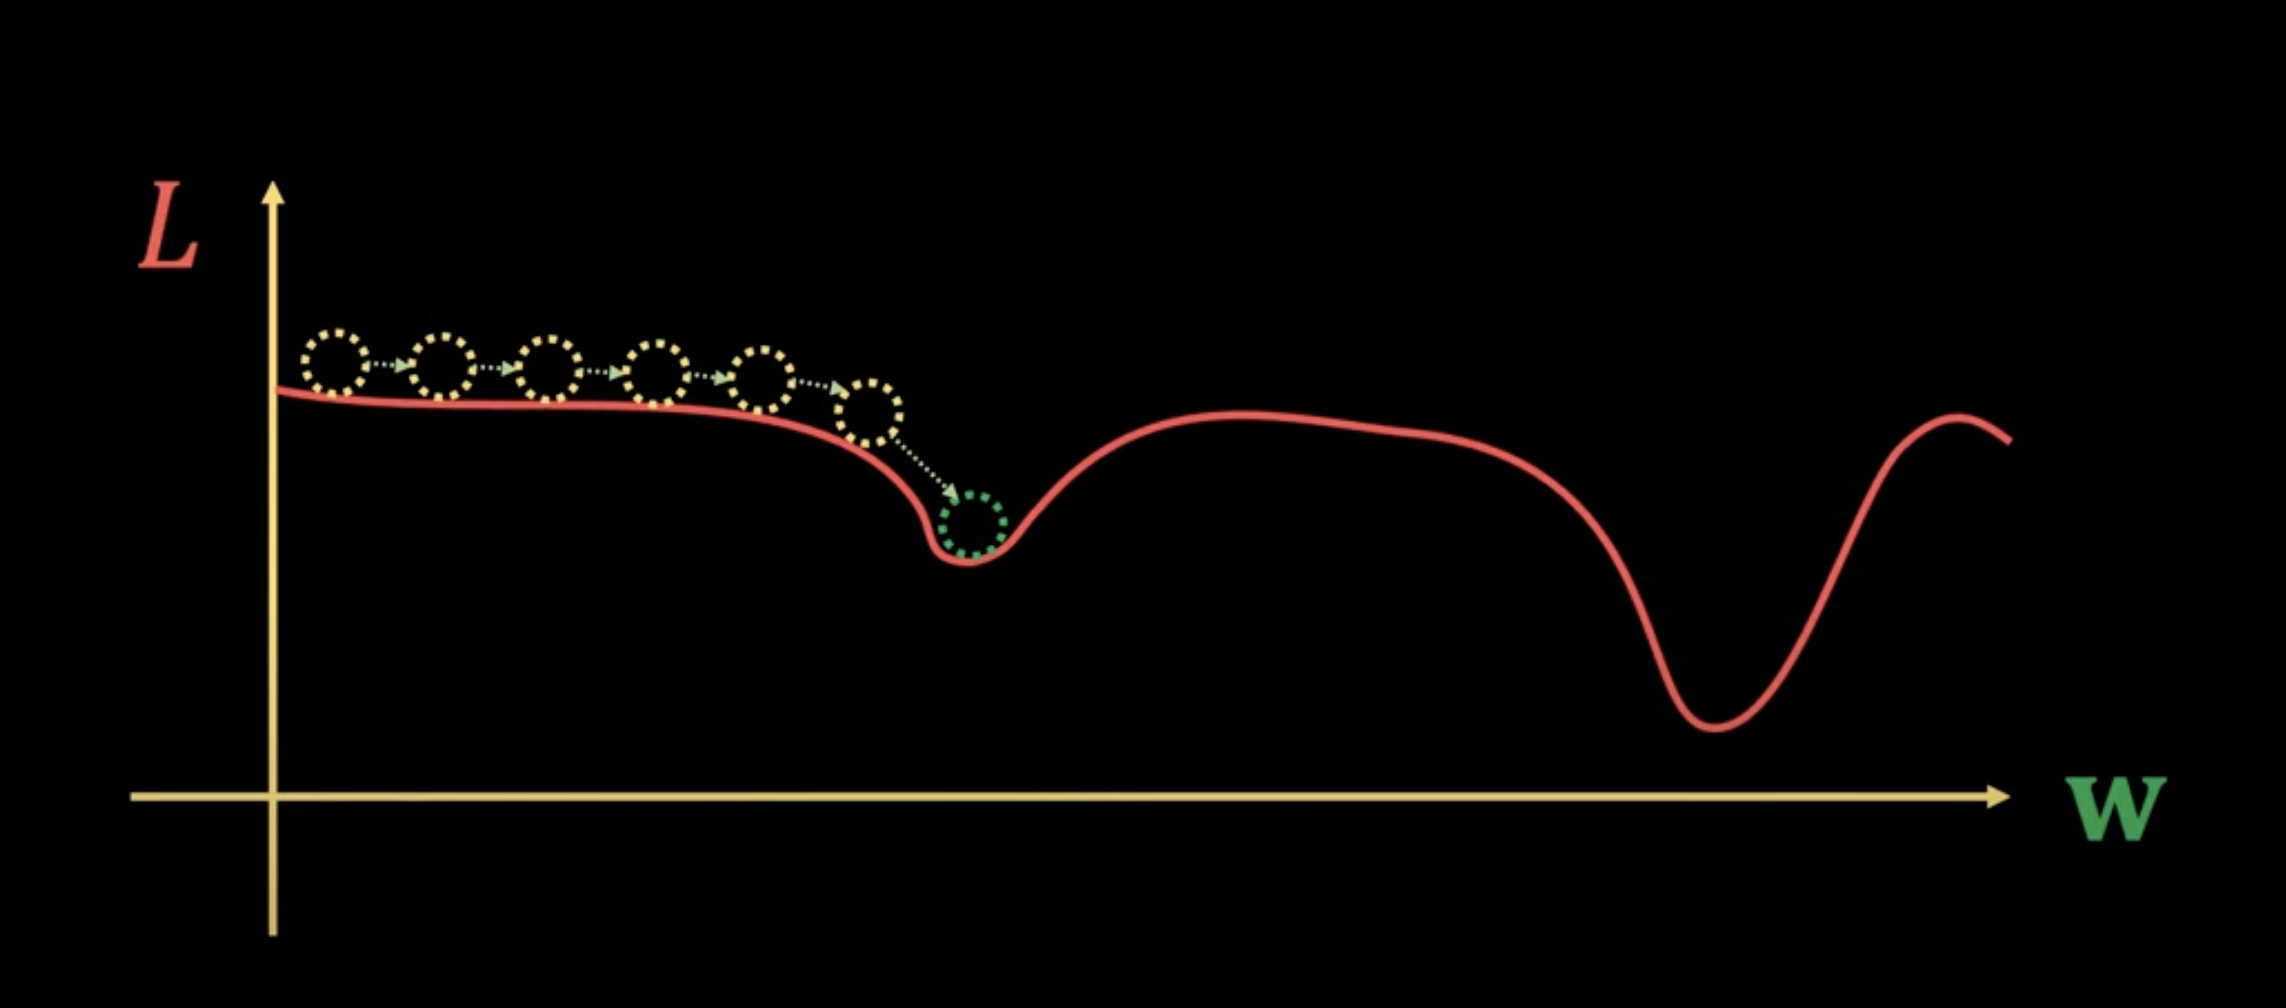

In [ ]:
Image(filename='/content/grive/MyDrive/Slides/Assignment1_AI/sgd.png', width=600,height=300)

source: https://youtu.be/NE88eqLngkg?si=vusKBofvwEJVSTfy

But for SGD + Momentum, we have something like this:

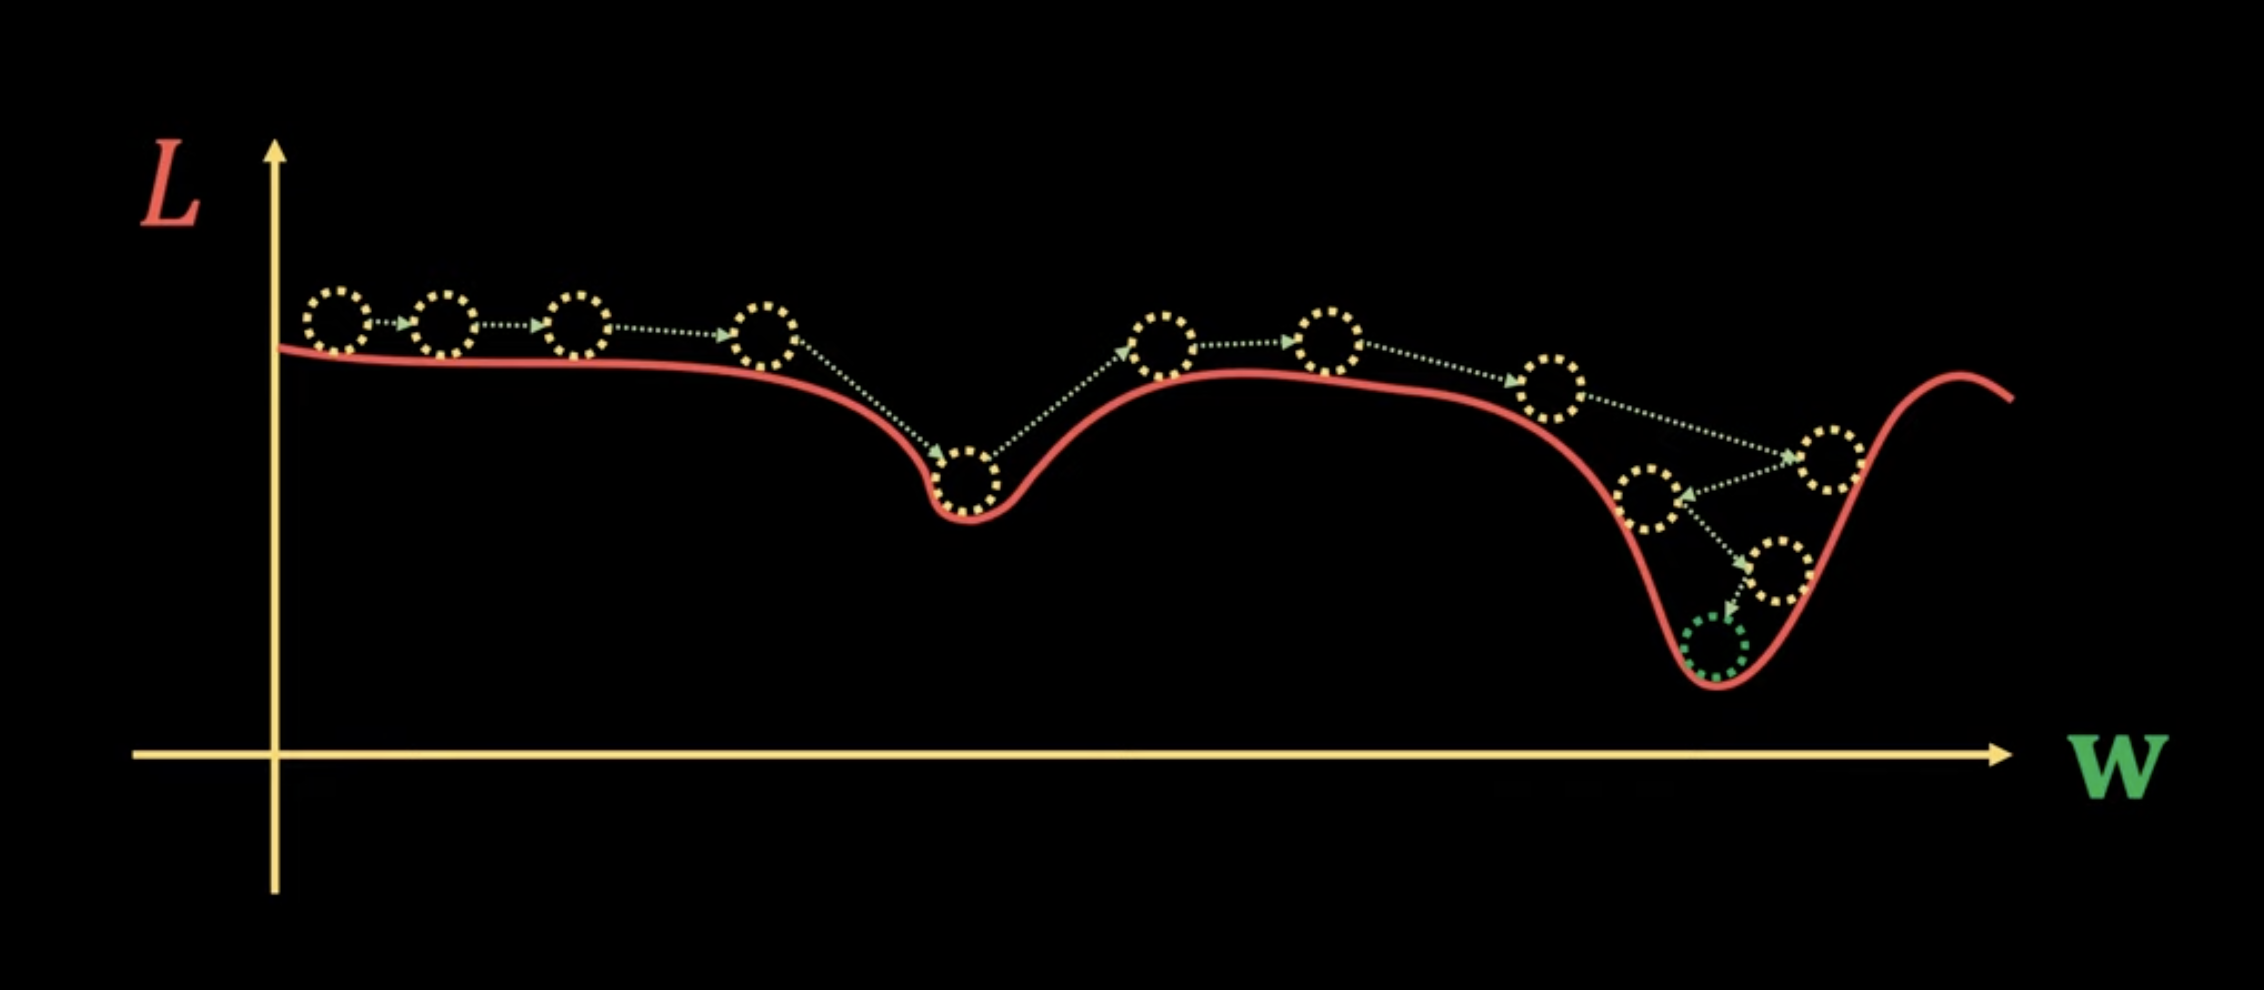

In [ ]:
Image(filename='/content/grive/MyDrive/Slides/Assignment1_AI/sgd_momentum.png', width=600,height=300)

source: https://youtu.be/NE88eqLngkg?si=vusKBofvwEJVSTfy

## **1_3: Adaptive gradients(AdaGrad):**

***1_3_1: The Idea Behind It:***

In a model, not all features are the same; they may be **sparse** (occurring rarely) or **dense** (occurring often).

 What if we make larger updates for those features that occur rarely in our observations and smaller updates for those that occur frequently in our samples?

 What if we have different learning rates for different features and for different parameters?

  What if we update the learning rate after each iteration?

  What if we have **adaptive** learning rate and gradient?

***1_3_2: Mathematical Formula:***

So our update would be something like this:


$$\theta_{t+1} = \theta_t - \eta'_t \nabla_{\theta} J_t(\theta) $$

And we calculate our learning rate by this formula:

$$ \eta'_t  = \frac {\eta}{\epsilon + \sqrt{\sum^t_{\tau = 1} J^2_{\tau}(\theta)}}$$



*   $\epsilon$ os a factor to avoid divide by zero. Its default value can be $10^{-8}$.
*   We have the sum of squares of the past gradients for the $\theta$ under the square root.
*   Remember that the $\theta$ is our one column vector of parameters.
* $\eta$ is our constant learning rate, same for all parameters.


source: The book 'Deep learning illustrated'

## **1_4: Root Mean Square Propagation(RMSprop):**

***1_4_1: Mathematical Background:***

In AdaGrad, as we do more and more iterations, the learning rate gets smaller and smaller because it is divided by a larger and larger value. This can make learning too slow or stop it altogether.

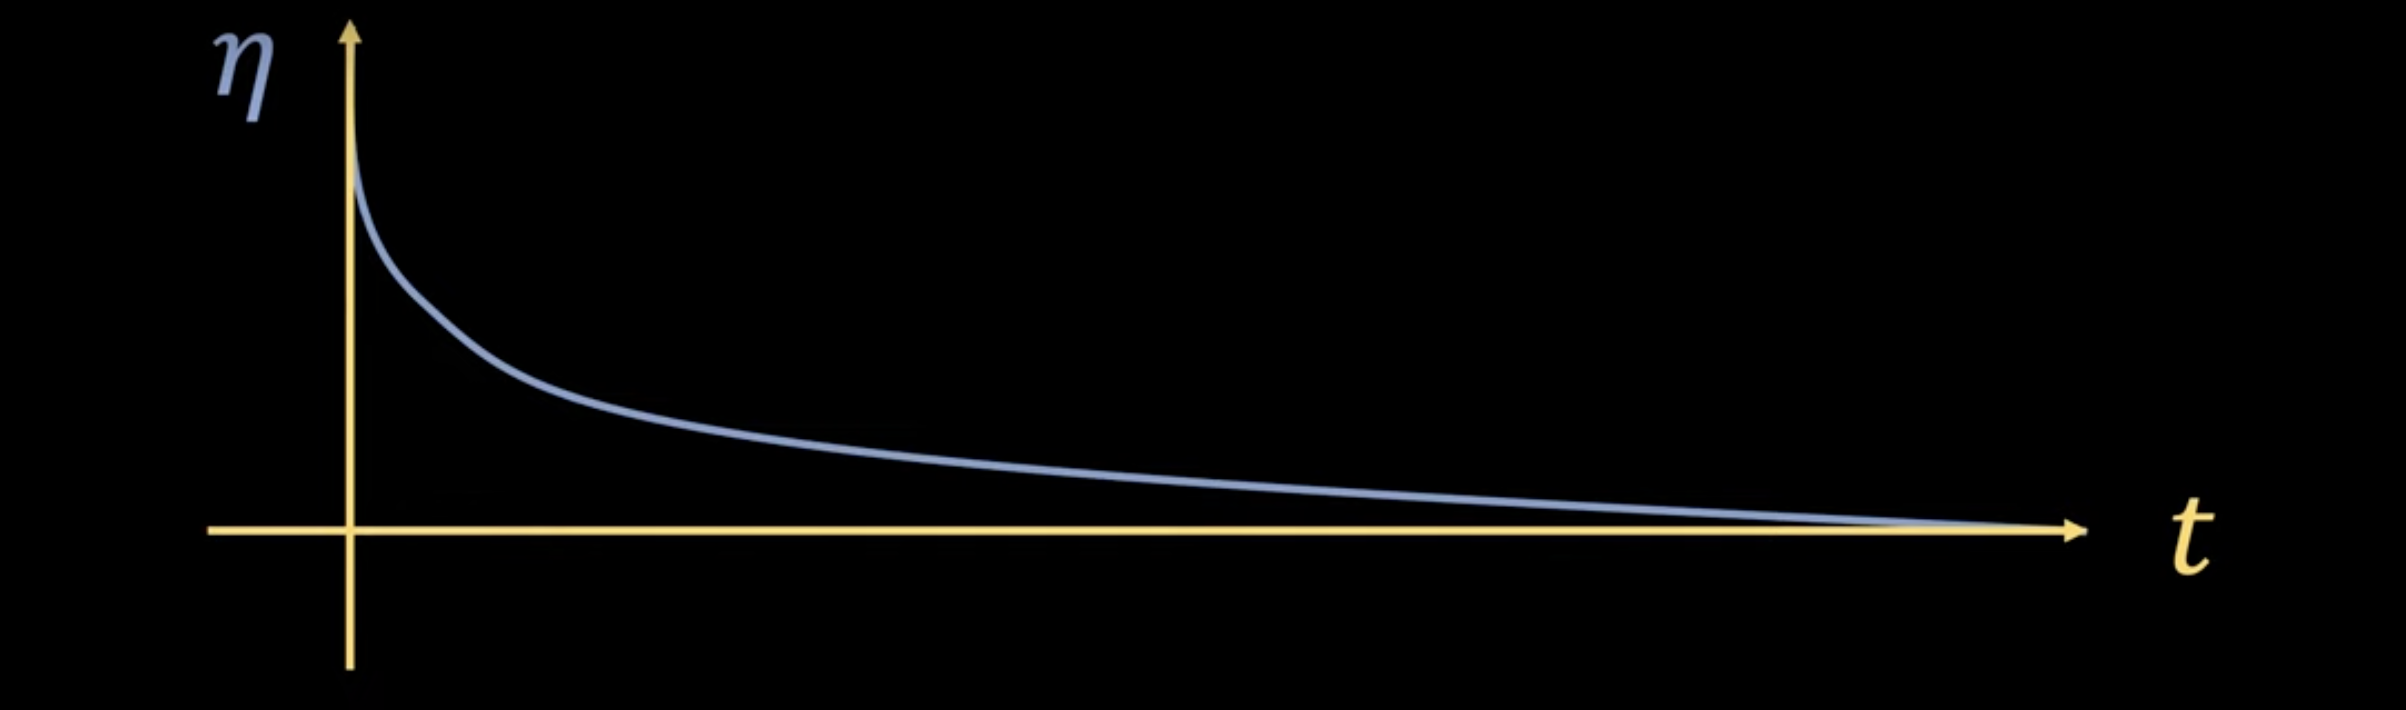

In [ ]:
Image(filename='/content/grive/MyDrive/Slides/Assignment1_AI/adegrad_learning_rate.png', width=900,height=350)

source: https://youtu.be/NE88eqLngkg?si=vusKBofvwEJVSTfy

So how can we avoid it?

How can we prevent the learning rate from decreasing too rapidly?

We can use the idea of **exponentially decaying** average of squared gradients, and learning rate becomes more adapted based on the recent gradients.

***1_4_2: Mathematical Formula:***

We can rewrite the formula of Adegrad as below:

$$ \eta'_t  = \frac {\eta}{\epsilon + \sqrt{v_{t}(\theta)}}$$

Where $v_{t}(\theta)$ is equal to:

$${\sum^t_{\tau = 1} J^2_{\tau}(\theta)} = {\sum^{t-1}_{\tau = 1} J^2_{\tau}(\theta)} + J_{t}^2(\theta)$$

$$v_{t}(\theta) = v_{t-1}(\theta) + J_{t}^2(\theta)$$

However, for RMSprop, instead of the sum of squares of the past gradients under the square root, we use a decaying hyperparameter for the previous squared gradients, which is:

$$v_{t}(\theta) = \rho v_{t-1}(\theta) + J_{t}^2(\theta)$$

*   $\rho$ is our dampening rate, and its default value is 0.95 (between 0.9 and 0.999)

It exponentially decays the effect of previous gradients And prevents the learning rate to become too small.

How?

$v_{t} = \rho v_{t-1} + J_{t}^2$

$v_{t} = \rho (\rho v_{t-2} + J_{t-1}^2) + J_{t}^2 = \rho^2 v_{t-2} + \rho J_{t-1}^2 + J_{t}^2$

$v_{t} = \rho^2 (\rho v_{t-3} + J_{t-2}^2) + \rho J_{t-1}^2 + J_{t}^2 = \rho^3 v_{t-3} + \rho^2 J_{t-2}^2 + \rho J_{t-1}^2 + J_{t}^2$


$v_{t} = \sum^{t}_{\tau = 1} \rho^{t-\tau} J_{\tau}^2$

# <b><font color='green'>Part2:</font></b> Application of these Optimizers and their cons and pros.

## **2_1: SGD:**

***2_1_1: Advantages:***

*   Faster computation for large datasets compared to Standard Gradient Descent.
*   Noisy behavior may help avoid getting stuck in local minima.
*   Noisy behavior can slightly reduce overfitting to our dataset.
* In some cases, by choosing a random batch data, SGD can push model out of local minima quicker than 'Adam' and generalize the model better(which makes model to perform well not only on the training data but also on unseen or new data drawn from the same distribution.)(https://proceedings.neurips.cc/paper/2020/file/f3f27a324736617f20abbf2ffd806f6d-Paper.pdf).

***2_1_2: Disdvantages:***

*   Having a different random batch for each iteration can lead to noisy behavior, causing oscillations during the move.


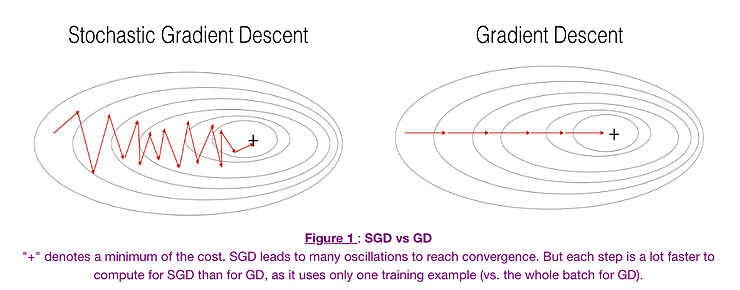

In [ ]:
Image(filename='/content/grive/MyDrive/Slides/Assignment1_AI/sgd_vs_gd.png', width=750,height=300)

source: https://www.analyticsvidhya.com/blog/2021/06/complete-guide-to-gradient-based-optimizers/

*   If the gradient becomes equal to zero in saddle points or local minima, it can get stuck there and learning may stop.


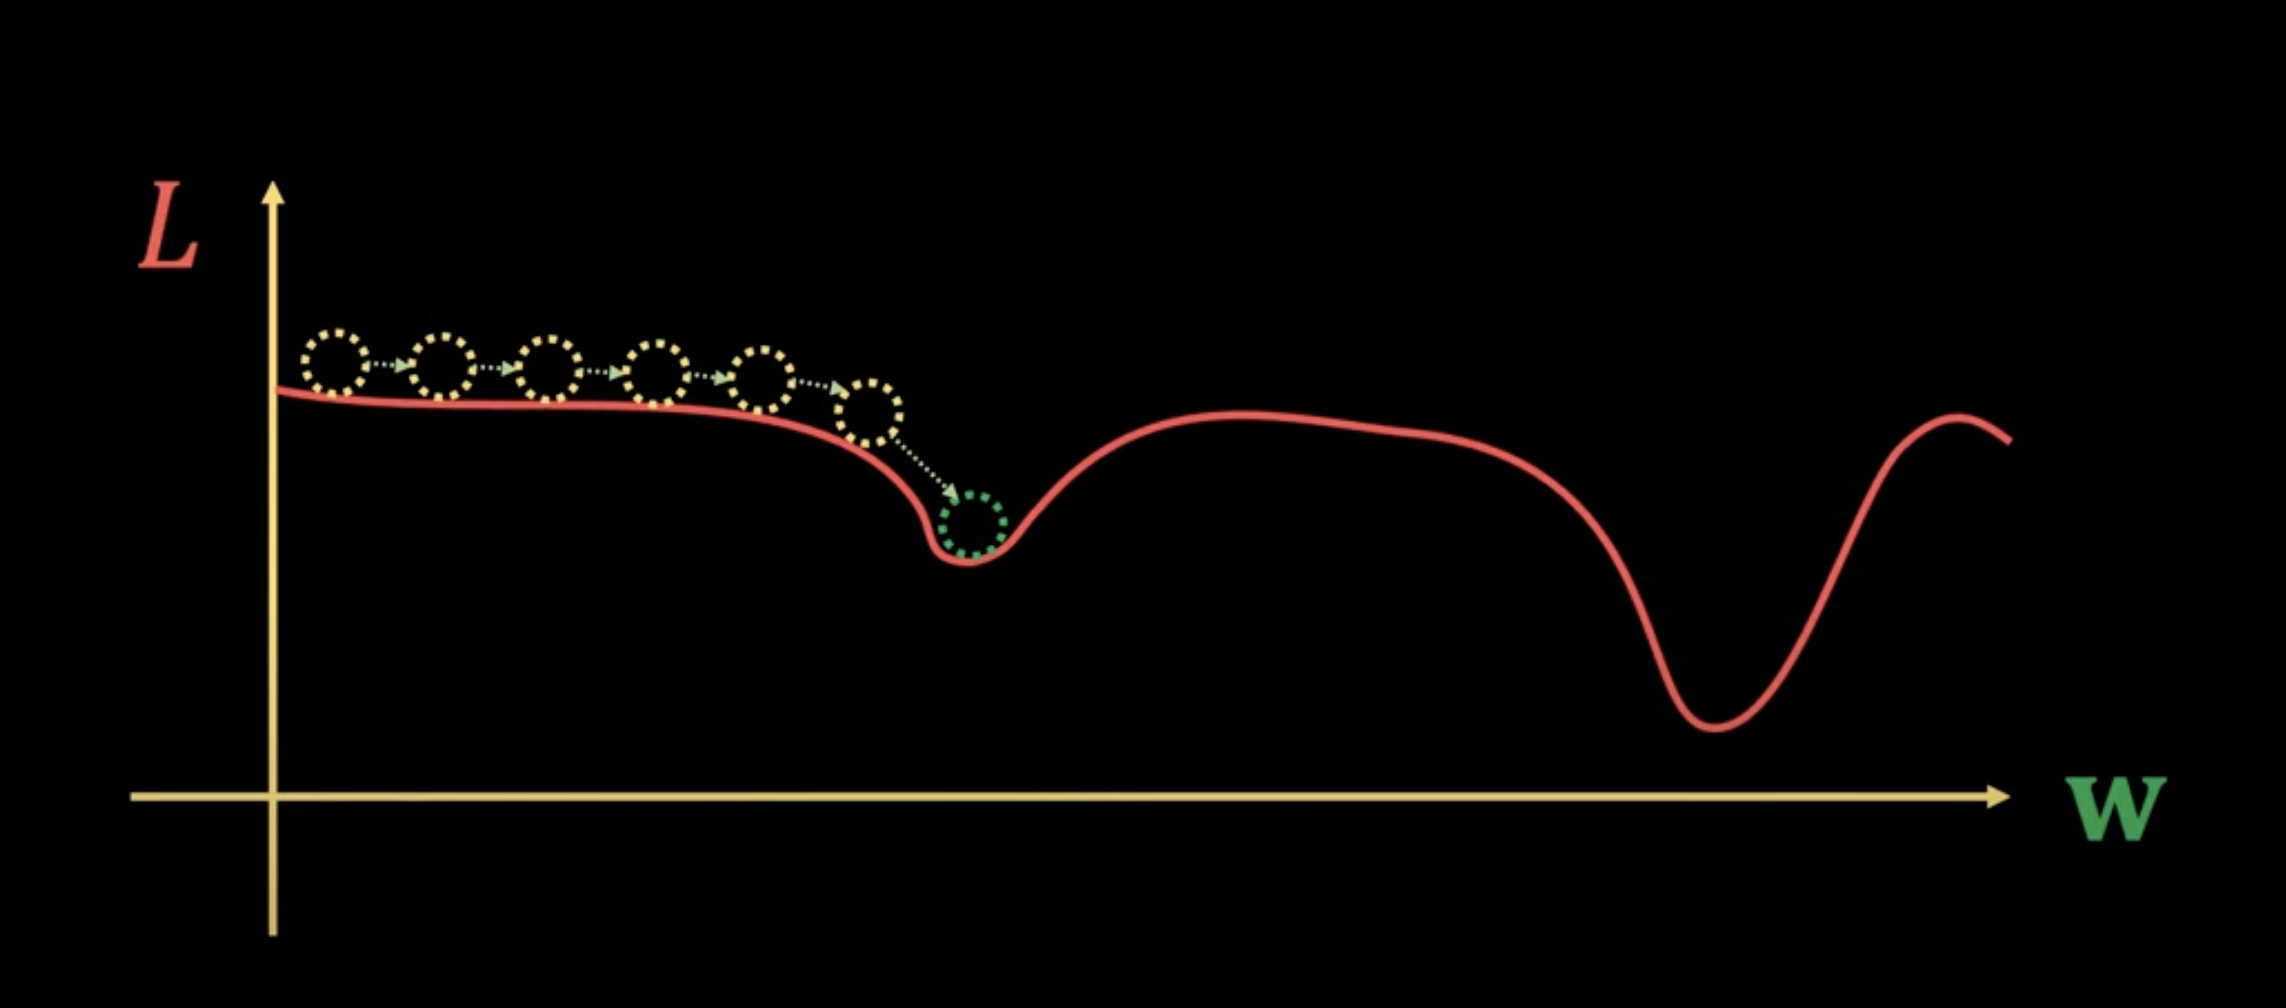

In [ ]:
Image(filename='/content/grive/MyDrive/Slides/Assignment1_AI/sgd.png', width=600,height=300)

*   Tuning the learning rate can be difficult.



*   If we don't tune the learning rate well and set it to a large value, it may cause **overshooting** (which occurs when the learning rate is too high, causing the algorithm to jump over the minimum of the loss function, leading to oscillations or divergence).



## **2_2: SGD + Momentum:**

***2_2_1: Advantages:***


*   Through this process, the momentum term helps the optimization process accelerate in the direction of previous gradients and dampen oscillations and smooth out the parameter update, leading to faster convergence compared to SGD.



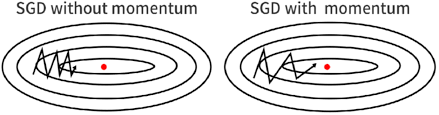

In [ ]:
Image(filename='/content/grive/MyDrive/Slides/Assignment1_AI/compare_momentum.png', width=600,height=150)

source: https://paperswithcode.com/method/sgd-with-momentum

*   By adding the momentum term, it can escape flat minima (saddle points) and small local minima more easily.
* It can potentially handle non-convex loss better, as it can scape local minima and saddle points.

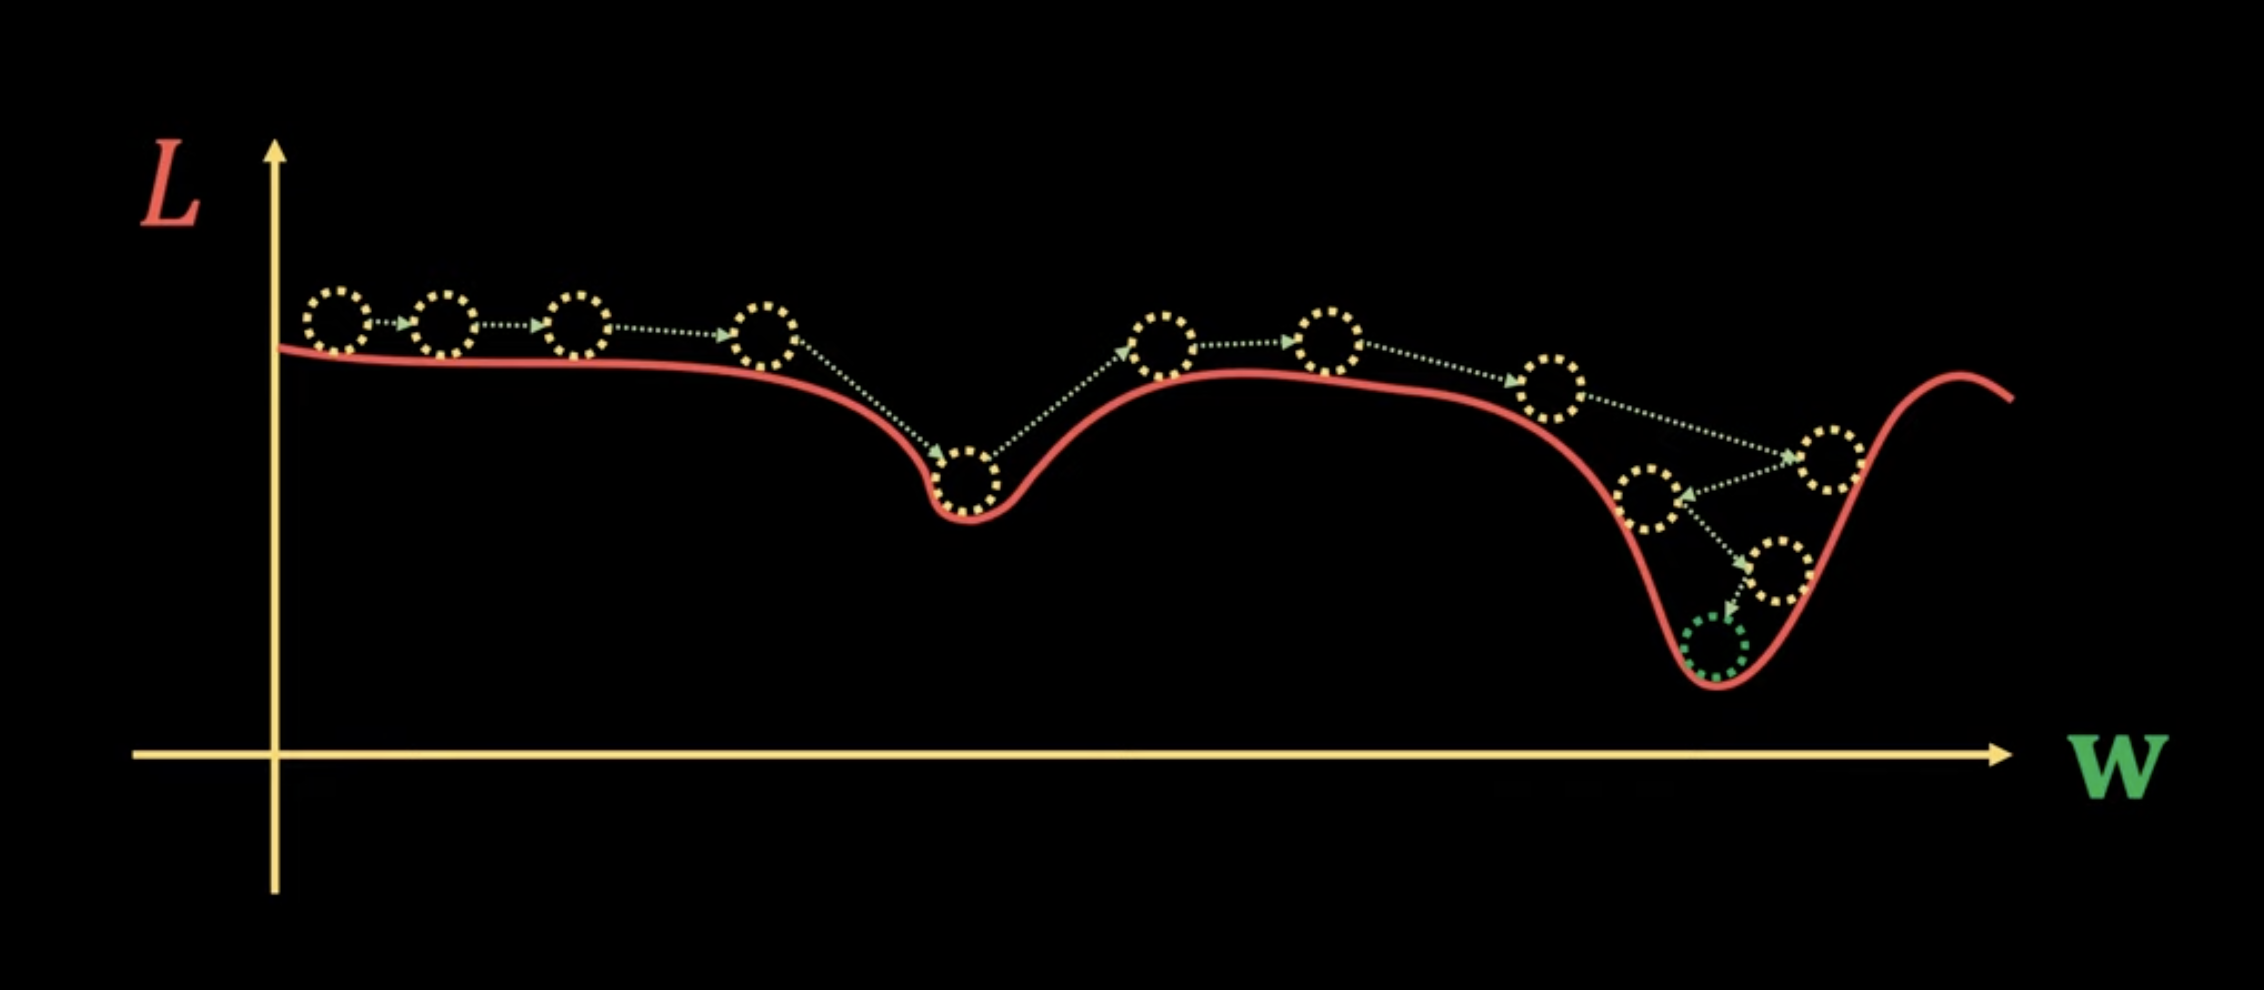

In [ ]:
Image(filename='/content/grive/MyDrive/Slides/Assignment1_AI/sgd_momentum.png', width=600,height=300)

As you can see, it moves faster in the horizontal direction.

***2_2_2: Disdvantages:***


*   If we don't tune the learning rate well, it may cause overshooting, which can result in oscillations around the global minimum. This is especially likely to happen if the learning rate is too high.
*   Manually tuning the learning rate can be difficult.



## **2_3: AdaGrad:**

***2_3_1: Advantages:***


*   AdaGrad requires less manual fine-tuning of the learning rate, as it uses an adaptive learning rate based on the historical gradient information.
*   AdaGrad can handle different learning rates for different kind of features, like sparse and dense features, as it adjusts the learning rate based on the frequency of each feature in the data.

*  By decreasing the learning rate over and over, the probability of overshooting becomes significantly lower.



***2_3_2: Disdvantages:***

* As more and more epochs pass, the learning rate decreases and may eventually become zero. As a result, the learning process slows down significantly during the last iterations.


*  Adagrad may not perform well on sparse features, causing the learning rate to decrease too rapidly due to frequent updates with respect to the data.




## **2_4: RMSprop:**

***2_4_1: Advantages:***



*   RMSProp adapts the learning rates for each parameter based on the recent gradients.
*   Like AdaGrad, RMSprop is flexible in handling sparse and dense data, and can therefore adapt better to different data characteristics.
*   RMSprop avoids the diminishing learning rates found in AdaGrad.





***2_4_2: Disdvantages:***

*   As it can retain the value of the learning rate, if our learning rate is large, then it can cause overshooting.

Overall, for all of these optimizers, tuning different hyperparameters like the learning rate $\eta$ and the decay rate $\rho$ can be challenging. In such cases, we can use advanced hyperparameter optimization techniques, such as tools like Keras Tuner, To find the best values for them.

# <b><font color='green'>Part3:</font></b> SMOTE

## **3_1: The Problem With Imbalanced Data:**


When one class has significantly more samples than another, we are facing imbalanced data.

In imbalanced data, there will be a **bias** towards the majority class. This bias can lead to the model being more accurate in predicting the majority class compared to the minority class.

Minority class observations look like **noise** to the model and are ignored by the model.

## **3_2: Ways to handle Imbalanced Data:**


We can **undersample** the majority class or we can **oversample**
the minority class.

One of the methods of oversampling is SMOTE.

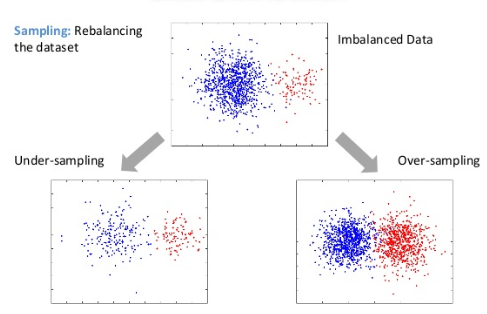

In [ ]:
Image(filename='/content/grive/MyDrive/Slides/Assignment1_AI/oversampling_vs_undersampling.png', width=750,height=500)

## **3_3: Definition Of SMOTE:**


The Synthetic Minority Oversampling Technique (SMOTE) is used for imbalanced datasets by synthetically and artificially generating new instances for the minority class.

## **3_4: SMOTE vs Ordinary Oversampling:**

 Unlike simply duplicating records, SMOTE enhances diversity by creating artificial instances.

 It helps to create new samples that are similar to the existing minority class samples, rather than simply increasing the number of identical samples.

## **3_5: Procedure:**



1.   **Select a Minority Class Sample:** Choose a sample from the minority class in the original dataset.

2.   **Find k Nearest Minority Class Neighbors:** Identify the k nearest neighbors of the selected minority class sample in the feature space.
3.   **Randomly Select a Neighbor:** Randomly pick one of the k nearest neighbors.


4.   **Generate a New Synthetic Sample:** Create a new synthetic sample by interpolating between the selected minority class sample and the randomly chosen neighbor.










We repeat these steps for each minority class sample to generate a set of synthetic samples, with the aim of balancing the data.

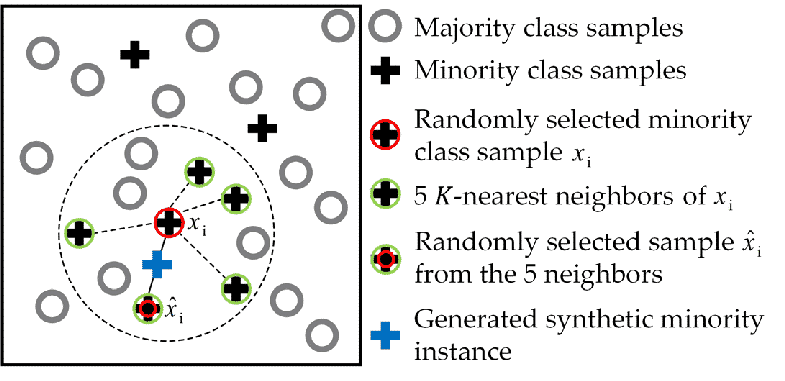

In [ ]:
Image(filename='/content/grive/MyDrive/Slides/Assignment1_AI/smote_procedure.png', width=550,height=300)

source: https://rikunert.com/smote_explained

## **3_6: Mathematical Formula:**

$$x_{new} = x_{i} + \lambda \times (x_{i} - x_{j})$$

Where:

*   $x_{new}$ is the feature vector of the new synthetic sample.
*   $x_{i}$ is the feature vector of initially selected sample.
*   $x_{j}$ is the feature vector of one of the k nearest neighbors of $x_{i}$. k is a hyperparameter.
*   $\lambda$ is a random number between 0 and 1; So the $x_{new}$ is not necessarily placed in the middle between the $x_{i}$ and $x_{j}$.







## **3_7: Advantages:**



*   **Improved Model Performance:** It helps prevent the model from being biased towards the majority class.

*   **Reduces the Risk of Overfitting:** If our minority class has a small dataset, we may encounter overfitting. Additionally, simple oversampling techniques such as duplicating minority class samples can lead to overfitting, as they introduce redundant information into the training data. SMOTE generates synthetic samples that are not exact duplicates of existing samples, thereby reducing the risk of overfitting.

*   **Preserves Information:** SMOTE creates synthetic samples between existing minority class samples,filling in the gaps and ensuring that the characteristics and distribution of the minority class are preserved.
*   **No Loss of Information:** Unlike undersampling techniques that discard majority class samples, SMOTE retains all minority class samples. This ensures that no information is lost from the original dataset during the balancing process.

## **3_8: Disadvantages:**



*   **Overfitting in Noise:** If the minority class contains noisy or irrelevant data points, SMOTE may create synthetic samples in regions of the feature space that contain noise. This can lead to overfitting, where the model learns to classify noise rather than meaningful patterns in the data.
*   **Limitations of SMOTE in High-Dimensional Data:** SMOTE encounters challenges in high-dimensional data, like in image processing, due to computational complexity and data sparsity. Sparse features and limited samples can result in synthetic samples that don't represent the true data distribution. Thus, SMOTE's effectiveness in creating new feature vectors for synthetic samples in high-dimensional datasets is diminished.





## **3_9: Example Using Python & TensorFlow:**

For this part, I used the imbalanced dataset from part 4 to evaluate and compare the results of the model before and after applying the SMOTE method. Therefore, I will discuss it at the beginning of part 4. We will observe that by utilizing the SMOTE method, we achieve higher accuracy and lower loss for our model.

# <b><font color='green'>Part4:</font></b> Using SMOTE With Adagrad & RMSprop


### Here is the datapath of the Dataset in my google drive:

In [ ]:
data_path="/content/grive/MyDrive/Assignment_1_Dataset.csv"

###I import the necessary libraries, like 'numpy' for arrays and 'pandas' for dataframes:

In [ ]:
import numpy as np
import pandas as pd

###Here, we read the CSV file of the dataset located at the specified data path:

In [ ]:
df=pd.read_csv(data_path)

### Let's look at the dataframe in more details:

In [ ]:
df.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F86,F87,F88,F89,F90,F91,F92,Target,Unnamed: 93,Unnamed: 94
count,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,1.113040e+05,111304.000000,...,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,0.0,0.0
mean,1.384011,16.234637,1.141181,109.371424,1.678242,4.501159,0.116312,0.031535,3.779658e+06,38.706920,...,32.613482,63.606753,4096.888638,1.325262,13.327666,32.536432,1.247233,0.811660,NaN,NaN
std,0.486584,13.833192,1.729046,119.132927,0.467153,1.828697,1.364295,0.574920,2.086547e+08,47.314877,...,25.041610,2.130230,2210.531994,1.848414,8.912911,25.294460,0.971636,0.896797,NaN,NaN
min,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,...,0.000000,61.000000,1403.000000,0.000000,0.000000,0.000000,1.000000,0.000000,NaN,NaN
25%,1.000000,6.000000,0.000000,26.000000,1.000000,4.000000,0.000000,0.000000,0.000000e+00,10.000000,...,24.000000,61.000000,1416.000000,0.000000,0.000000,23.000000,1.000000,0.000000,NaN,NaN
50%,1.000000,7.000000,0.000000,50.000000,2.000000,4.000000,0.000000,0.000000,0.000000e+00,22.000000,...,36.000000,63.000000,3454.000000,0.000000,18.000000,36.000000,1.000000,0.000000,NaN,NaN
75%,2.000000,27.000000,2.000000,170.000000,2.000000,6.000000,0.000000,0.000000,0.000000e+00,48.000000,...,36.000000,66.000000,6444.000000,4.000000,18.000000,36.000000,1.000000,2.000000,NaN,NaN
max,4.000000,44.000000,6.000000,932.000000,2.000000,8.000000,88.000000,50.000000,3.889600e+10,332.000000,...,300.000000,70.000000,9960.000000,7.000000,36.000000,300.000000,87.000000,2.000000,NaN,NaN


###Obtain the number of unique classes:

In [ ]:
df.Target.unique()

array([2, 1, 0])

###Import necessary libraries for plotting:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

###Plot the distribution of the data.

<Axes: xlabel='Target', ylabel='count'>

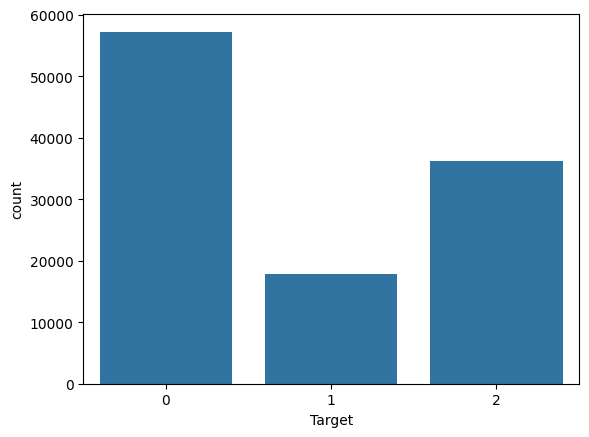

In [ ]:
sns.countplot(x="Target", data=df)

###Devide the dataset as input X and output y:

####All columns except 'Target' and the last two redundant columns are input.

In [ ]:
X=df.drop({'Target', 'Unnamed: 93', 'Unnamed: 94'}, axis=1)

####Target column is our output:

In [ ]:
y=df['Target']

###Print the size of dataframe to obtain the number of samples and features:

In [ ]:
X.shape

(111304, 92)

In [ ]:
no_features = X.shape[1]
no_neurons = X.shape[1]

In [ ]:
y.shape

(111304,)

**from sklearn.preprocessing import MinMaxScaler:** This line imports the MinMaxScaler class from the scikit-learn library, which is used for scaling features to a specified range, typically between 0 and 1.

**scaler = MinMaxScaler():** This creates an instance of the MinMaxScaler class, which will be used to scale the features.

**X = scaler.fit_transform(X):** This line scales the features in the dataset X using the fit_transform() method of the MinMaxScaler object scaler. This method computes the minimum and maximum values of each feature in X, and then scales the features to the range [0, 1] using the formula:

$$X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}$$


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

### Import necessary libraries for building machine learning models and neural networks:

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### We make our neural network here:

**keras.Sequential()** function allows you to build and train deep learning models in a sequential manner by stacking layers on top of each other.

**Relu activation functoin** maps all the negative values to zero. adding nonlinearity to our model

**dropout(0.5)**  A dropout rate of 0.5 means that each neuron has a 50% chance of being dropped out during each training iteration.

**BatchNormalization** is used to normalize the activations of each layer, typically aiming for zero mean and unit variance.

**Softmax activation function** is commonly used in multiclass classification tasks. It outputs a probability distribution over multiple classes, with each class having a probability value between 0 and 1. The sum of all probabilities for all classes is equal to 1.

In [ ]:
from keras.layers import Dense, Dropout, BatchNormalization

def make_model(no_neurons, no_features):
  model = keras.Sequential()
  model.add(layers.Dense(no_neurons, activation='relu', input_dim=no_features))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(no_neurons, activation='relu'))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(no_neurons, activation='relu'))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(no_neurons, activation='relu'))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(3, activation='softmax'))
  return model

In the following function, we are going to split our dataset into three parts: the training set, validation set, and test set.

At first, we split the data into training and validation sets, with 10% reserved for validation.

Then, we split the training set into two parts: a training set, which is approximately 5.5556% of 90%, or 5% of the whole data, and the remaining 85% serves as our final training set.

To ensure that the data split will be the same every time the code is run with the same seed, I use **random_state=12**. Having consistent data splits allows for consistent model evaluation and comparison.

In [ ]:
from sklearn.model_selection import train_test_split

def split_data(X, y):
  X_data, y_data = X, y
  X_train , X_valid , y_train , y_valid = train_test_split(X_data, y_data, test_size=0.1, random_state=12)
  X_train , X_test , y_train , y_test = train_test_split(X_train , y_train , test_size=0.05556, random_state=12)

  return X_train, X_test, X_valid, y_train, y_test, y_valid

In [ ]:
X_train, X_test, X_valid, y_train, y_test, y_valid = split_data(X,y)

In [ ]:
model1 = make_model(no_neurons = no_neurons, no_features = no_features)

In [ ]:
Adegrad = tf.keras.optimizers.Adagrad(learning_rate=0.01,epsilon=1.0e-08)

**sparse_categorical_crossentropy:**


*   Use this loss function when your labels are provided as integers (e.g., [0, 1, 2] for three classes).
*   It does not require one-hot encoding of the target labels.
*   Internally, TensorFlow performs the one-hot encoding (e.g., [1, 0, 0], [0, 1, 0], [0, 0, 1] for three classes) implicitly.



**metrics=['accuracy']** indicates that the model will compute and report the accuracy of its predictions during training and evaluation.


In [ ]:
model1.compile(loss='sparse_categorical_crossentropy', optimizer=Adegrad, metrics=['accuracy'])

**batch_size:** The number of samples per gradient update. In each training iteration, the model will process batch_size samples before updating the model's parameters.

**epoch:** It means one complete pass through the entire training dataset during the training process.

In [ ]:
WhithoutSmoteHistory =  model1.fit(x = X_train, y = y_train, epochs = 300, batch_size = 256, validation_data=(X_valid, y_valid))

Epoch 1/300
370/370 [==============================] - 5s 10ms/step - loss: 1.1507 - accuracy: 0.4603 - val_loss: 0.8960 - val_accuracy: 0.5434
Epoch 2/300
370/370 [==============================] - 4s 11ms/step - loss: 0.9246 - accuracy: 0.5325 - val_loss: 0.8356 - val_accuracy: 0.5699
Epoch 3/300
370/370 [==============================] - 3s 8ms/step - loss: 0.8863 - accuracy: 0.5499 - val_loss: 0.8184 - val_accuracy: 0.5753
Epoch 4/300
370/370 [==============================] - 3s 8ms/step - loss: 0.8671 - accuracy: 0.5535 - val_loss: 0.8058 - val_accuracy: 0.5768
Epoch 5/300
370/370 [==============================] - 6s 15ms/step - loss: 0.8545 - accuracy: 0.5593 - val_loss: 0.7965 - val_accuracy: 0.5835
Epoch 6/300
370/370 [==============================] - 6s 16ms/step - loss: 0.8430 - accuracy: 0.5647 - val_loss: 0.7894 - val_accuracy: 0.5955
Epoch 7/300
370/370 [==============================] - 3s 7ms/step - loss: 0.8356 - accuracy: 0.5656 - val_loss: 0.7837 - val_accuracy: 0.

In [ ]:
loss1, accuracy1 = model1.evaluate(X_test, y_test)

174/174 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.6599


### We plot the loss of our first model, which was generated wothout using SMOTE:

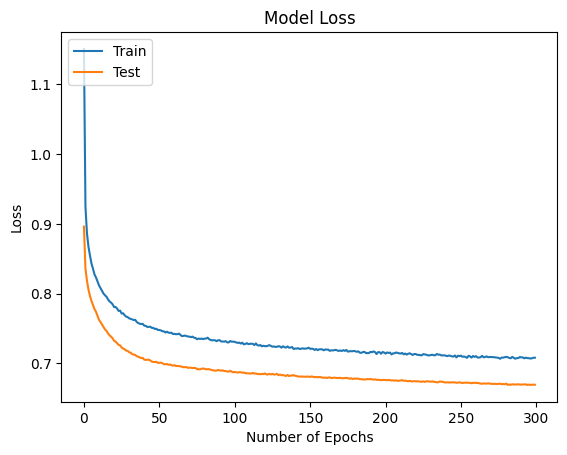

In [ ]:
plt.plot(WhithoutSmoteHistory.history['loss'])
plt.plot(WhithoutSmoteHistory.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### We plot the accuracy of our first model:

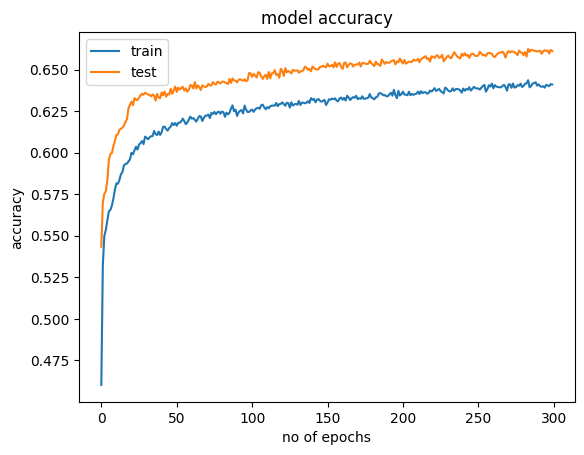

In [ ]:
plt.plot(WhithoutSmoteHistory.history['accuracy'])
plt.plot(WhithoutSmoteHistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('no of epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Before using SMOTE, we had something like this:

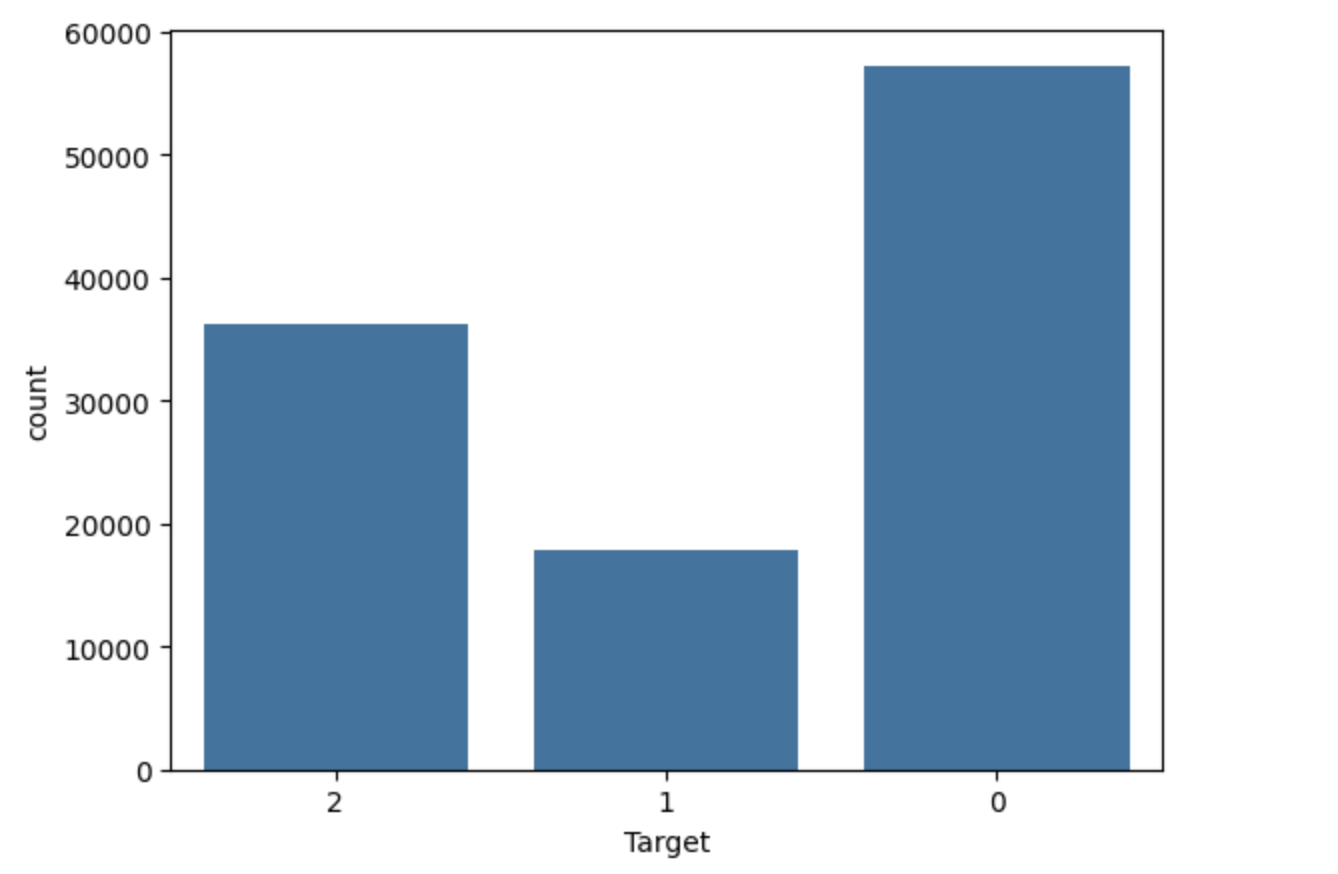

In [ ]:
Image(filename='/content/grive/MyDrive/Slides/Assignment1_AI/before_smote.png', width=550,height=300)

After using it, we will have something like this:

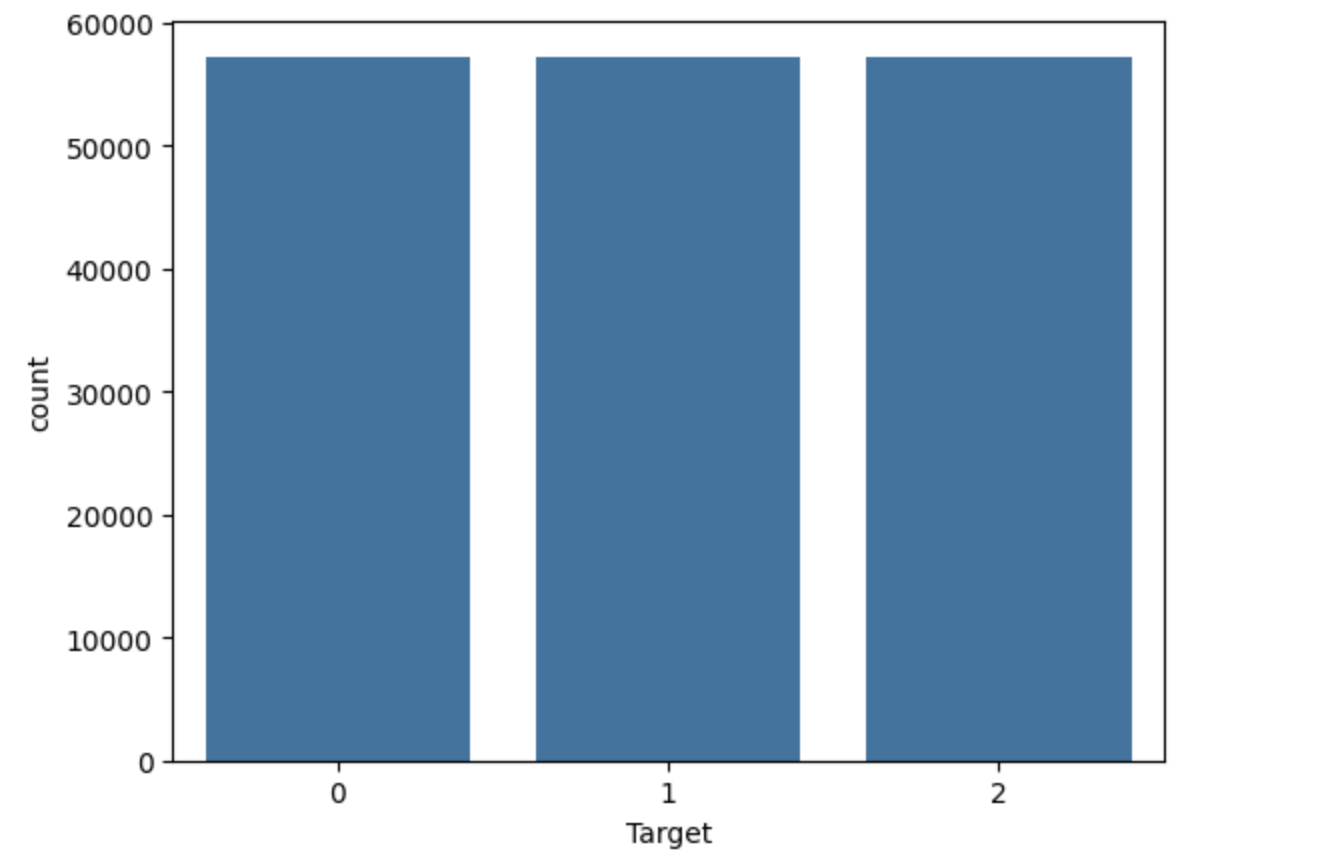

In [ ]:
Image(filename='/content/grive/MyDrive/Slides/Assignment1_AI/after_smote.png', width=550,height=300)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resample, y_resample = smote.fit_resample(X, y)

In [ ]:
X_train, X_test, X_valid, y_train, y_test, y_valid = split_data(X_resample,y_resample)

In [ ]:
model2 = make_model(no_neurons = no_neurons, no_features = no_features)

In [ ]:
Adegrad = tf.keras.optimizers.Adagrad(learning_rate=0.01,epsilon=1.0e-08)

In [ ]:
model2.compile(loss='sparse_categorical_crossentropy', optimizer=Adegrad, metrics=['accuracy'])

In [ ]:
AdagradHistory =  model2.fit(x = X_train , y = y_train , epochs = 300, batch_size = 256, validation_data=(X_valid , y_valid))

Epoch 1/300
570/570 [==============================] - 6s 8ms/step - loss: 1.0192 - accuracy: 0.5101 - val_loss: 0.8060 - val_accuracy: 0.6214
Epoch 2/300
570/570 [==============================] - 5s 8ms/step - loss: 0.8530 - accuracy: 0.5803 - val_loss: 0.7805 - val_accuracy: 0.6320
Epoch 3/300
570/570 [==============================] - 6s 10ms/step - loss: 0.8279 - accuracy: 0.5964 - val_loss: 0.7652 - val_accuracy: 0.6387
Epoch 4/300
570/570 [==============================] - 4s 8ms/step - loss: 0.8131 - accuracy: 0.6073 - val_loss: 0.7559 - val_accuracy: 0.6423
Epoch 5/300
570/570 [==============================] - 5s 9ms/step - loss: 0.8047 - accuracy: 0.6140 - val_loss: 0.7485 - val_accuracy: 0.6460
Epoch 6/300
570/570 [==============================] - 5s 9ms/step - loss: 0.7970 - accuracy: 0.6196 - val_loss: 0.7421 - val_accuracy: 0.6523
Epoch 7/300
570/570 [==============================] - 4s 8ms/step - loss: 0.7878 - accuracy: 0.6257 - val_loss: 0.7356 - val_accuracy: 0.658

In [ ]:
loss2, accuracy2 = model2.evaluate(X_test, y_test)

269/269 [==============================] - 1s 2ms/step - loss: 0.6372 - accuracy: 0.7044


### We plot the loss of our second model, which was generated by using SMOTE and applying AdaGrad optimizer:

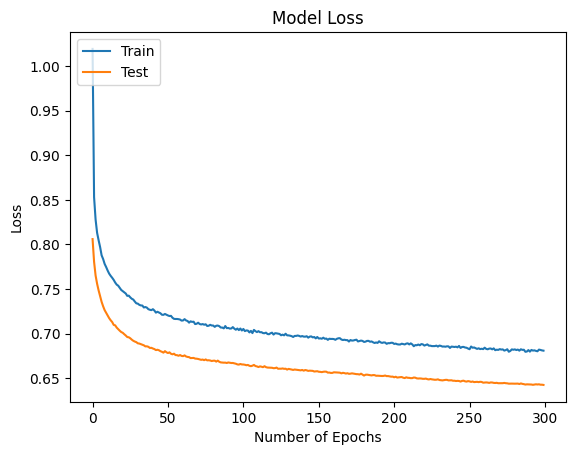

In [ ]:
plt.plot(AdagradHistory.history['loss'])
plt.plot(AdagradHistory.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Here, we plot the accuracy of our second model:

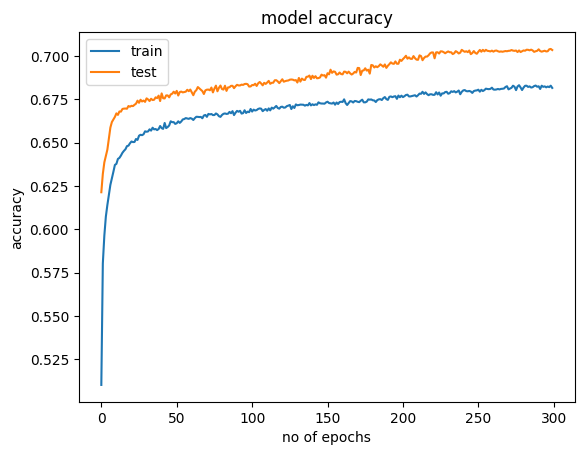

In [ ]:
plt.plot(AdagradHistory.history['accuracy'])
plt.plot(AdagradHistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('no of epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
X_train, X_test, X_valid, y_train, y_test, y_valid= split_data(X_resample, y_resample)

In [ ]:
model3 = make_model(no_neurons = no_neurons, no_features = no_features)

In [ ]:
RMSprop = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.95, epsilon = 1.0e-08)

In [ ]:
model3.compile(loss='sparse_categorical_crossentropy', optimizer=RMSprop, metrics=['accuracy'])

In [ ]:
RMSpropHistory =  model3.fit(x = X_train , y = y_train , epochs = 300, batch_size = 256, validation_data=(X_valid , y_valid))

Epoch 1/300
570/570 [==============================] - 8s 10ms/step - loss: 0.9377 - accuracy: 0.5637 - val_loss: 0.7334 - val_accuracy: 0.6586
Epoch 2/300
570/570 [==============================] - 4s 8ms/step - loss: 0.7599 - accuracy: 0.6419 - val_loss: 0.6976 - val_accuracy: 0.6701
Epoch 3/300
570/570 [==============================] - 5s 10ms/step - loss: 0.7336 - accuracy: 0.6534 - val_loss: 0.6884 - val_accuracy: 0.6757
Epoch 4/300
570/570 [==============================] - 5s 9ms/step - loss: 0.7222 - accuracy: 0.6586 - val_loss: 0.6810 - val_accuracy: 0.6808
Epoch 5/300
570/570 [==============================] - 4s 7ms/step - loss: 0.7156 - accuracy: 0.6609 - val_loss: 0.6740 - val_accuracy: 0.6849
Epoch 6/300
570/570 [==============================] - 6s 10ms/step - loss: 0.7089 - accuracy: 0.6636 - val_loss: 0.6703 - val_accuracy: 0.6699
Epoch 7/300
570/570 [==============================] - 5s 9ms/step - loss: 0.7056 - accuracy: 0.6645 - val_loss: 0.6665 - val_accuracy: 0.6

In [ ]:
loss3, accuracy3 = model3.evaluate(X_test, y_test)

269/269 [==============================] - 0s 2ms/step - loss: 0.6073 - accuracy: 0.7169


### We plot the loss of our third model, which was generated by using SMOTE and applying RMSprop optimizer:

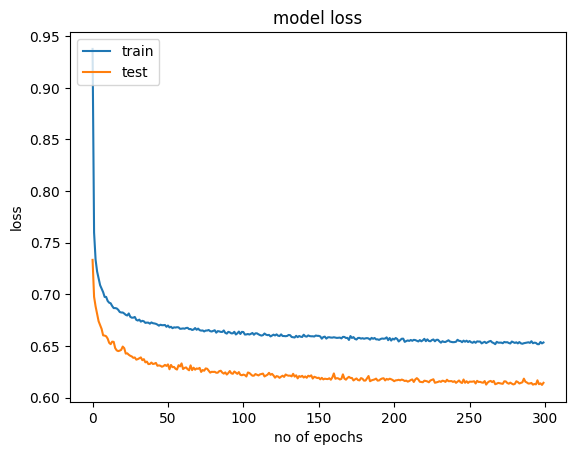

In [ ]:
plt.plot(RMSpropHistory.history['loss'])
plt.plot(RMSpropHistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### At last, we plot the accuracy of our third model:

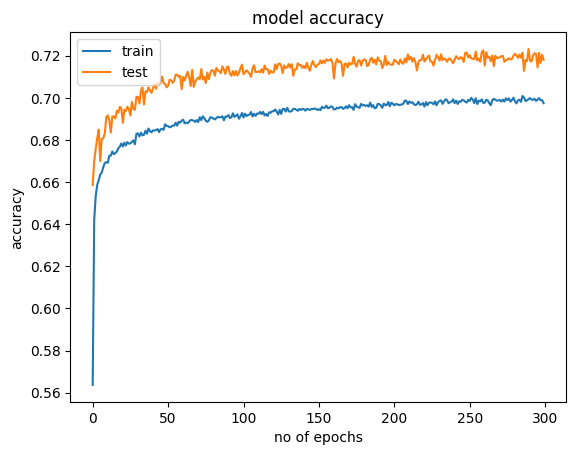

In [ ]:
plt.plot(RMSpropHistory.history['accuracy'])
plt.plot(RMSpropHistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('no of epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Refrences:


*   https://chat.openai.com/

*   https://youtube.com/

*   https://www.perplexity.ai/

*   https://www.geeksforgeeks.org/

*   Book 'Deep learning illustrated'

*   Book 'Francois_Chollet_Deep_Learning_with_Python'

Other sources were mentioned during presentation.









